In [1]:
from subpred.util import load_data

In [2]:
df_results_svm_calciumchloride = load_data("svc_human_calciumchloride",folder_path="../data/results").assign(Model="SVM",Substrates="Calcium/Chloride")
df_results_svm_calciumpotassium = load_data("svc_human_calciumpotassium",folder_path="../data/results").assign(Model="SVM",Substrates="Calcium/Potassium")
df_results_svm_chloridepotassium = load_data("svc_human_chloridepotassium",folder_path="../data/results").assign(Model="SVM",Substrates="Chloride/Potassium")
# df_results_svm_sugaramino = load_data("svc_human_sugaramino",folder_path="../data/results").assign(Model="SVM",Substrates="Sugar/Amino")

In [3]:
df_results_dnn_calciumchloride = load_data("dnn_human_calciumchloride",folder_path="../data/results").assign(Model="DNN",Substrates="Calcium/Chloride")
df_results_dnn_calciumpotassium = load_data("dnn_human_calciumpotassium",folder_path="../data/results").assign(Model="DNN",Substrates="Calcium/Potassium")
df_results_dnn_chloridepotassium = load_data("dnn_human_chloridepotassium",folder_path="../data/results").assign(Model="DNN",Substrates="Chloride/Potassium")
# df_results_dnn_sugaramino = load_data("dnn_human_sugaramino",folder_path="../data/results").assign(Model="DNN",Substrates="Sugar/Amino")

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_human_results = pd.concat(
    [
        df_results_svm_calciumchloride,
        df_results_svm_calciumpotassium,
        df_results_svm_chloridepotassium,
        # df_results_svm_sugaramino,
        df_results_dnn_calciumchloride,
        df_results_dnn_calciumpotassium,
        df_results_dnn_chloridepotassium,
        # df_results_dnn_sugaramino,
    ]
).copy()
df_human_results.Feature = df_human_results.Feature.str.replace("_","-")
df_human_results = df_human_results.reset_index(drop=True)
df_human_results

,Feature,Metric,Value,Model,Substrates
0,PROTT5-AA,Balanced Accuracy,0.891667,SVM,Calcium/Chloride
1,PROTT5-AA,Balanced Accuracy,0.850000,SVM,Calcium/Chloride
2,PROTT5-AA,Balanced Accuracy,0.825000,SVM,Calcium/Chloride
3,PROTT5-AA,Balanced Accuracy,0.975000,SVM,Calcium/Chloride
4,PROTT5-AA,Balanced Accuracy,0.954545,SVM,Calcium/Chloride
...,...,...,...,...,...
13995,META-STD,F1 Class 1,0.918919,DNN,Chloride/Potassium
13996,META-STD,Balanced Accuracy,0.845588,DNN,Chloride/Potassium
13997,META-STD,F1 Macro,0.853535,DNN,Chloride/Potassium
13998,META-STD,F1 Class 0,0.818182,DNN,Chloride/Potassium


In [5]:
df_human_results.Feature.unique()

array(['PROTT5-AA', 'PROSTT5-AA', 'PROSTT5-3DI', 'DUMMY', 'AAC', 'PAAC',
       'AA-KMER3', '3Di-COMP', '3Di-KMER2', '3Di-KMER3', 'COMB-KMER1',
       'COMB-KMER2', 'COMB-KMER3', 'PSSM-50-1', 'PSSM-50-3', 'PSSM-90-1',
       'PSSM-90-3', 'PSSM-META', 'META', 'META-STD'], dtype=object)

In [6]:
# df_human_results#.groupby(["Feature", "Model", "Substrates"]).median()


In [7]:

metric = "F1 Macro"
df_human_results_filtered = (
    df_human_results[
        # df_human_results.Feature.isin(features_keep)
        (df_human_results.Metric == "F1 Macro")
    ]
    .drop("Metric", axis=1)
    .reset_index(drop=True)
)
df_human_results_filtered.Model = (
    df_human_results_filtered.Model + " " + df_human_results_filtered.Feature
)

In [8]:
sorted(df_human_results_filtered.Model.unique())

['DNN 3Di-COMP',
 'DNN 3Di-KMER2',
 'DNN 3Di-KMER3',
 'DNN AA-KMER3',
 'DNN AAC',
 'DNN COMB-KMER1',
 'DNN COMB-KMER2',
 'DNN COMB-KMER3',
 'DNN DUMMY',
 'DNN META',
 'DNN META-STD',
 'DNN PAAC',
 'DNN PROSTT5-3DI',
 'DNN PROSTT5-AA',
 'DNN PROTT5-AA',
 'DNN PSSM-50-1',
 'DNN PSSM-50-3',
 'DNN PSSM-90-1',
 'DNN PSSM-90-3',
 'DNN PSSM-META',
 'SVM 3Di-COMP',
 'SVM 3Di-KMER2',
 'SVM 3Di-KMER3',
 'SVM AA-KMER3',
 'SVM AAC',
 'SVM COMB-KMER1',
 'SVM COMB-KMER2',
 'SVM COMB-KMER3',
 'SVM DUMMY',
 'SVM META',
 'SVM META-STD',
 'SVM PAAC',
 'SVM PROSTT5-3DI',
 'SVM PROSTT5-AA',
 'SVM PROTT5-AA',
 'SVM PSSM-50-1',
 'SVM PSSM-50-3',
 'SVM PSSM-90-1',
 'SVM PSSM-90-3',
 'SVM PSSM-META']

In [9]:
df_plots = df_human_results_filtered.copy()
# df_plots.Substrates = (
#     df_plots.Substrates.str.replace("Calcium", "Ca")
#     .str.replace("Chloride", "Cl")
#     .str.replace("Potassium", "K")
# )

In [10]:
def create_model_plot(df, hue_order, **kwargs):
    ax = sns.boxplot(df, x="Substrates",y="Value",hue="Model",hue_order=hue_order,**kwargs)
    ax.set_ylim((0,1.05))
    ax.set_ylabel("Macro F1", fontstyle='italic')
    ax.set_xlabel('Classification', fontstyle='italic')


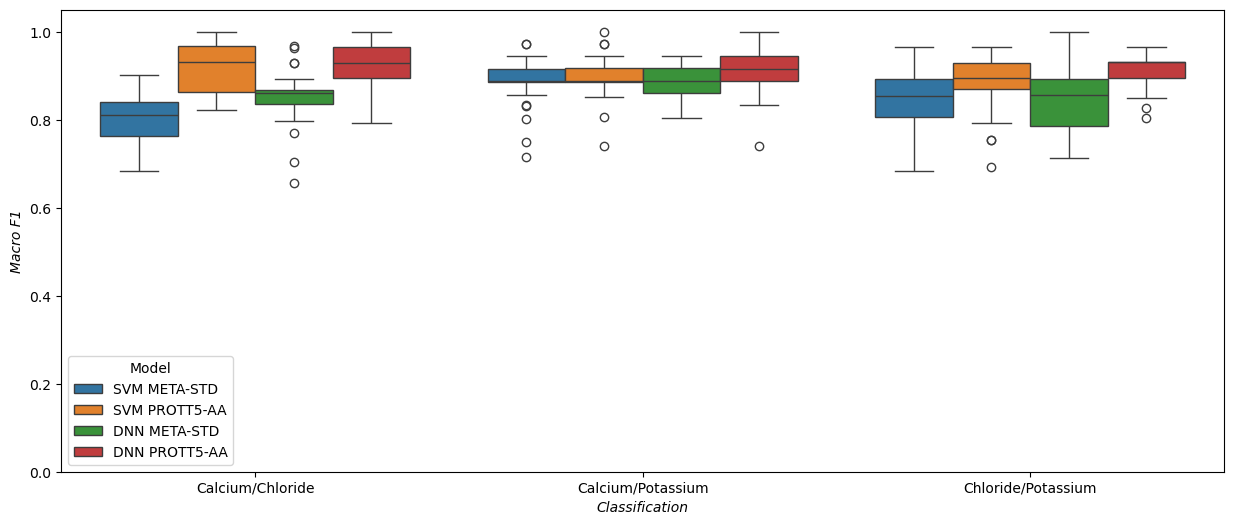

In [11]:
plt.figure(figsize=(15, 6))
create_model_plot(
    df_plots,
    hue_order=[
        "SVM META-STD",
        "SVM PROTT5-AA",
        "DNN META-STD",
        "DNN PROTT5-AA",
    ],
)
# plt.savefig("../data/results/plots_human_ion_dnn_vs_svm", dpi=300)
plt.show()

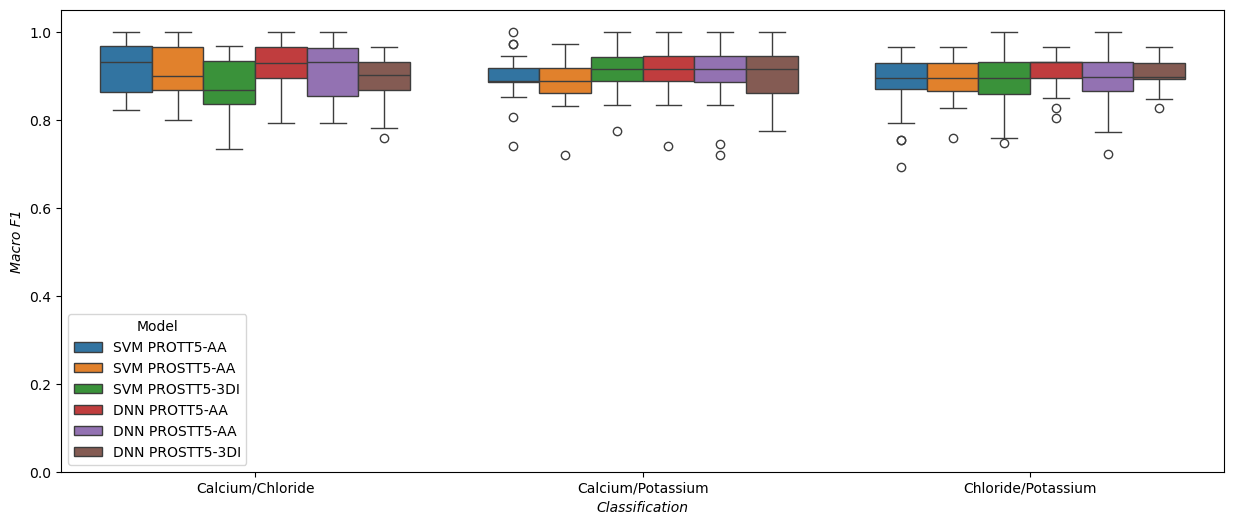

In [12]:
plt.figure(figsize=(15, 6))
create_model_plot(
    df_plots,
    hue_order=[
        "SVM PROTT5-AA",
        "SVM PROSTT5-AA",
        "SVM PROSTT5-3DI",
        "DNN PROTT5-AA",
        "DNN PROSTT5-AA",
        "DNN PROSTT5-3DI",
    ],
)

# plt.savefig("../data/results/plots_human_ion_embeddings_comparison", dpi=300)
plt.show()

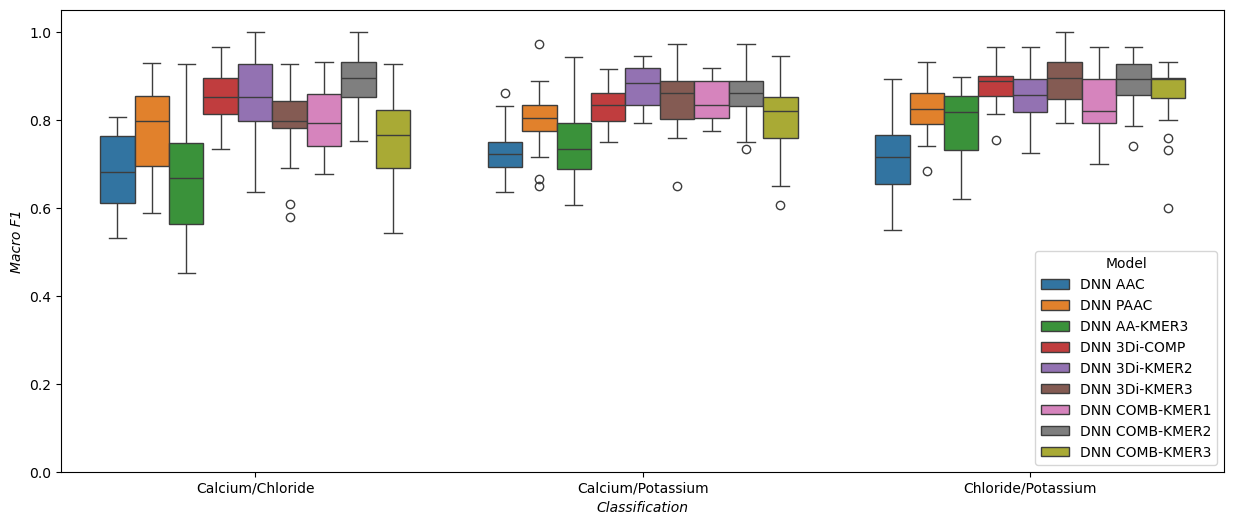

In [13]:
plt.figure(figsize=(15, 6))
create_model_plot(
    df_plots,
    hue_order=[
        "DNN AAC",
        "DNN PAAC",
        "DNN AA-KMER3",
        "DNN 3Di-COMP",
        "DNN 3Di-KMER2",
        "DNN 3Di-KMER3",
        "DNN COMB-KMER1",
        "DNN COMB-KMER2",
        "DNN COMB-KMER3",
    ],
)

# plt.savefig("../data/results/plots_human_ion_sequence_features_dnn", dpi=300)
plt.show()

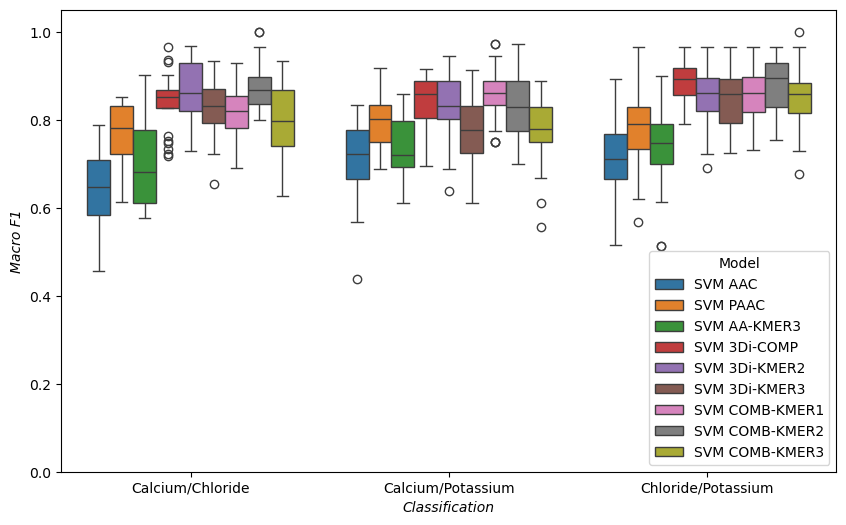

In [14]:
plt.figure(figsize=(10,6))
create_model_plot(
    df_plots,
    hue_order=[
        "SVM AAC",
        "SVM PAAC",
        "SVM AA-KMER3",
        "SVM 3Di-COMP",
        "SVM 3Di-KMER2",
        "SVM 3Di-KMER3",
        "SVM COMB-KMER1",
        "SVM COMB-KMER2",
        "SVM COMB-KMER3",
    ],
)

# plt.savefig("../data/results/plots_human_ion_sequence_features_svm", dpi=300)
plt.show()

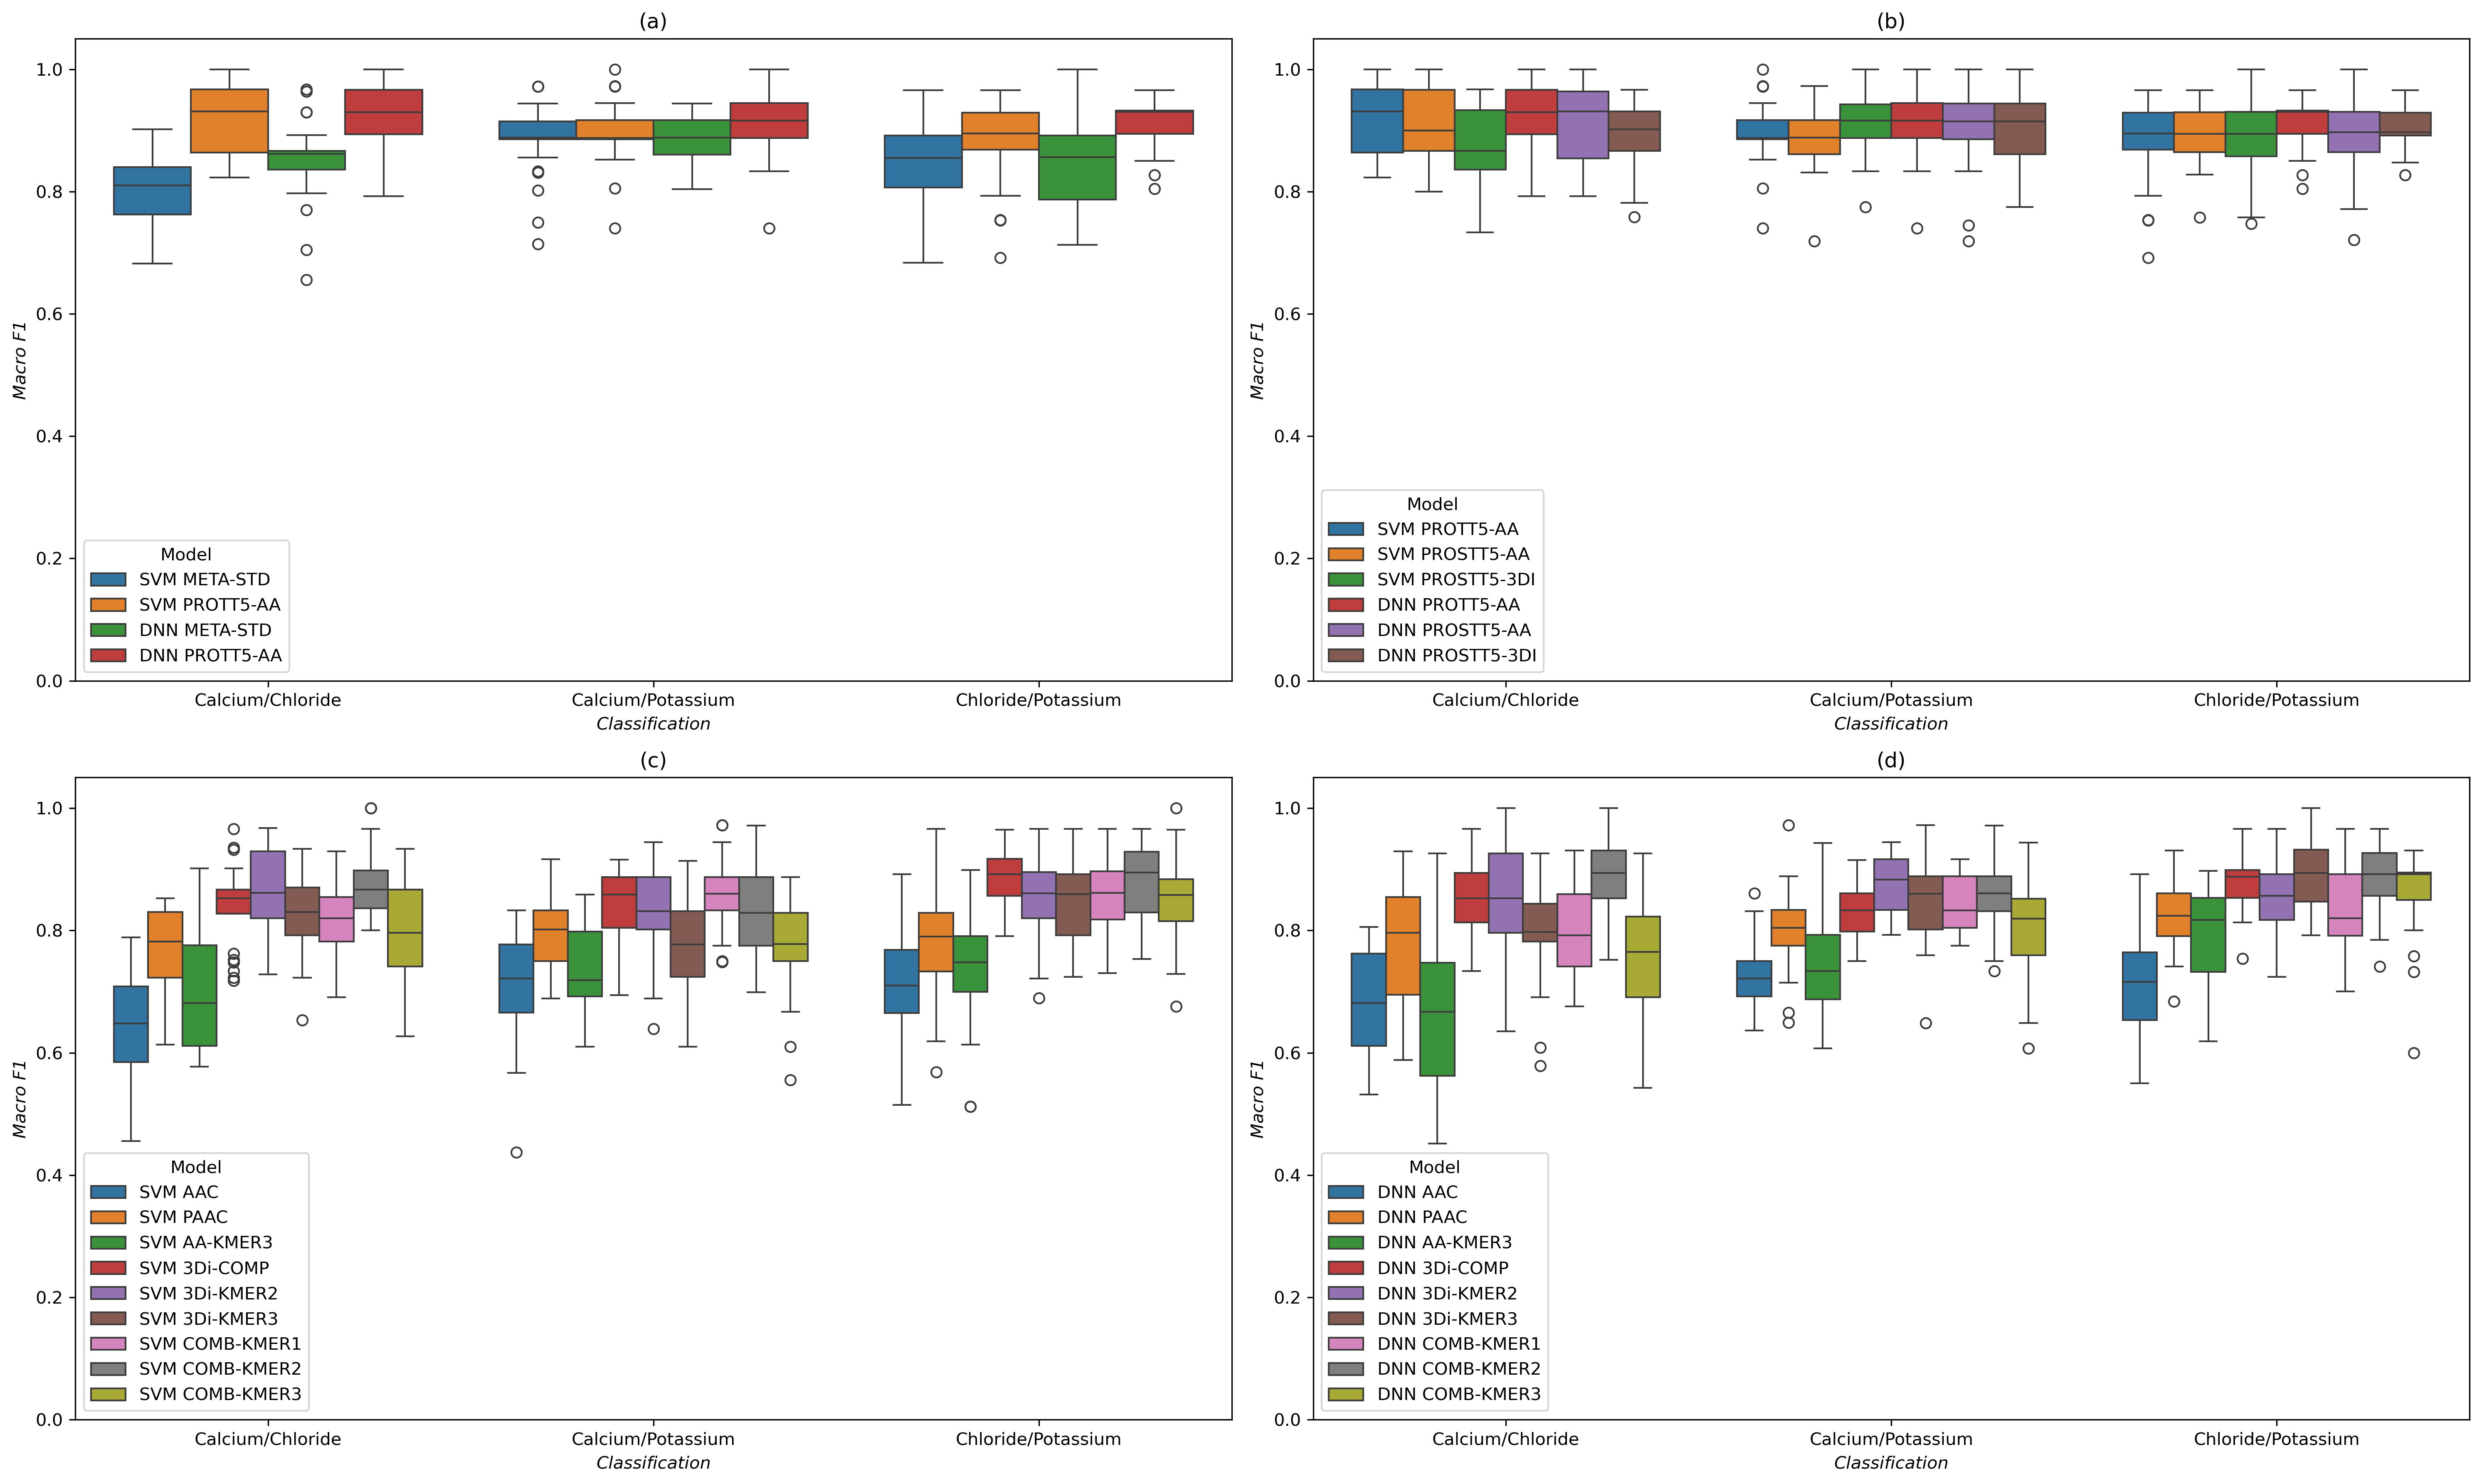

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12), dpi=300)

create_model_plot(
    df_plots,
    hue_order=[
        "SVM META-STD",
        "SVM PROTT5-AA",
        "DNN META-STD",
        "DNN PROTT5-AA",
    ],
    ax=axs[0, 0]
)
create_model_plot(
    df_plots,
    hue_order=[
        "SVM PROTT5-AA",
        "SVM PROSTT5-AA",
        "SVM PROSTT5-3DI",
        "DNN PROTT5-AA",
        "DNN PROSTT5-AA",
        "DNN PROSTT5-3DI",
    ],
    ax=axs[0, 1]
)
create_model_plot(
    df_plots,
    hue_order=[
        "DNN AAC",
        "DNN PAAC",
        "DNN AA-KMER3",
        "DNN 3Di-COMP",
        "DNN 3Di-KMER2",
        "DNN 3Di-KMER3",
        "DNN COMB-KMER1",
        "DNN COMB-KMER2",
        "DNN COMB-KMER3",
    ],
    ax=axs[1, 1]
)
create_model_plot(
    df_plots,
    hue_order=[
        "SVM AAC",
        "SVM PAAC",
        "SVM AA-KMER3",
        "SVM 3Di-COMP",
        "SVM 3Di-KMER2",
        "SVM 3Di-KMER3",
        "SVM COMB-KMER1",
        "SVM COMB-KMER2",
        "SVM COMB-KMER3",
    ],
    ax=axs[1, 0]
)
# axs[0, 0].text(0.9,0.1,"(a)",fontsize=14)
# axs[0, 1].text(0.9,0.1,"(b)",fontsize=14)
# axs[1, 0].text(0.9,0.1,"(c)",fontsize=14)
# axs[1, 1].text(0.9,0.1,"(d)",fontsize=14)
axs[0, 0].set_title('(a)')
axs[0, 1].set_title('(b)')
axs[1, 0].set_title('(c)')
axs[1, 1].set_title('(d)')
plt.tight_layout()
plt.savefig("../data/results/plots_human_ion", dpi=300)
plt.show()

## Tables

In [16]:
df_table = df_human_results.copy()
df_table = df_table[df_table.Metric == "F1 Macro"]
df_table.Substrates = (
    df_table.Substrates.str.replace("Calcium", "Ca")
    .str.replace("Chloride", "Cl")
    .str.replace("Potassium", "K")
)
df_table_str = (
    df_table.groupby(["Feature", "Metric", "Model", "Substrates"])
    .mean()
    .map(lambda x: f"{x:.3f}")
    + "±"
    + df_table.groupby(["Feature", "Metric", "Model", "Substrates"])
    .std()
    .map(lambda x: f"{x:.3f}".lstrip("0"))
)
df_table_str = df_table_str.reset_index().pivot(
    index="Feature", columns=["Model", "Substrates"], values="Value"
)

df_table_str.index = df_table_str.index.str.replace("PSSM-META", "MULTI-PSSM")
index_order = [
    "DUMMY",
    "AAC",
    "PAAC",
    "AA-KMER3",
    "3Di-COMP",
    "3Di-KMER2",
    "3Di-KMER3",
    "COMB-KMER1",
    "COMB-KMER2",
    "COMB-KMER3",
    "PSSM-50-1",
    "PSSM-50-3",
    "PSSM-90-1",
    "PSSM-90-3",
    "MULTI-PSSM",
    "META",
    "META-STD",
    "PROTT5-AA",
    "PROSTT5-AA",
    "PROSTT5-3DI",
]
df_table_str = df_table_str.loc[index_order]
df_table_str

Model               DNN                                 SVM              \
Substrates        Ca/Cl        Ca/K        Cl/K       Ca/Cl        Ca/K   
Feature                                                                   
DUMMY        0.522±.088  0.477±.062  0.498±.088  0.459±.084  0.505±.080   
AAC          0.684±.087  0.725±.053  0.712±.088  0.645±.084  0.703±.086   
PAAC         0.775±.094  0.805±.075  0.828±.063  0.767±.067  0.795±.059   
AA-KMER3     0.663±.122  0.752±.080  0.798±.078  0.700±.097  0.743±.076   
3Di-COMP     0.844±.060  0.831±.044  0.876±.050  0.839±.068  0.832±.055   
3Di-KMER2    0.854±.082  0.877±.049  0.845±.058  0.860±.068  0.832±.075   
3Di-KMER3    0.795±.078  0.855±.076  0.894±.060  0.825±.066  0.777±.076   
COMB-KMER1   0.798±.077  0.848±.049  0.837±.071  0.817±.063  0.857±.063   
COMB-KMER2   0.889±.063  0.861±.054  0.882±.059  0.880±.056  0.837±.066   
COMB-KMER3   0.755±.095  0.801±.080  0.861±.076  0.798±.082  0.773±.079   
PSSM-50-1    0.769±.084  0.834±.067  0.791±.071  0.755±.061  0.808±.063   
PSSM-50-3    0.796±.052  0.863±.061  0.811±.075  0.803±.072  0.839±.056   
PSSM-90-1    0.769±.105  0.776±.050  0.778±.083  0.739±.070  0.742±.045   
PSSM-90-3    0.784±.084  0.773±.062  0.781±.087  0.739±.070  0.742±.045   
MULTI-PSSM   0.780±.077  0.833±.072  0.785±.082  0.783±.057  0.797±.052   
META         0.782±.072  0.803±.084  0.812±.065  0.826±.062  0.812±.061   
META-STD     0.851±.069  0.891±.038  0.850±.080  0.807±.055  0.884±.061   
PROTT5-AA    0.921±.059  0.915±.056  0.918±.043  0.922±.058  0.899±.054   
PROSTT5-AA   0.909±.065  0.903±.065  0.898±.061  0.911±.062  0.893±.054   
PROSTT5-3DI  0.894±.057  0.908±.053  0.908±.038  0.878±.068  0.911±.050   

Model                    
Substrates         Cl/K  
Feature                  
DUMMY        0.471±.078  
AAC          0.705±.081  
PAAC         0.787±.083  
AA-KMER3     0.741±.077  
3Di-COMP     0.885±.043  
3Di-KMER2    0.854±.065  
3Di-KMER3    0.845±.061  
COMB-KMER1   0.864±.061  
COMB-KMER2   0.880±.060  
COMB-KMER3   0.847±.058  
PSSM-50-1    0.783±.071  
PSSM-50-3    0.806±.069  
PSSM-90-1    0.759±.067  
PSSM-90-3    0.759±.067  
MULTI-PSSM   0.770±.077  
META         0.784±.082  
META-STD     0.839±.072  
PROTT5-AA    0.889±.056  
PROSTT5-AA   0.898±.045  
PROSTT5-3DI  0.890±.061

In [17]:
print(
    df_table_str.to_latex()
    .replace("tabular", "tabular*")
    .replace("{lllllll}", "{\\textwidth}{@{\\extracolsep{\\fill}} lrrrrrr}")
)

\begin{tabular*}{\textwidth}{@{\extracolsep{\fill}} lrrrrrr}
\toprule
Model & \multicolumn{3}{r}{DNN} & \multicolumn{3}{r}{SVM} \\
Substrates & Ca/Cl & Ca/K & Cl/K & Ca/Cl & Ca/K & Cl/K \\
Feature &  &  &  &  &  &  \\
\midrule
DUMMY & 0.522±.088 & 0.477±.062 & 0.498±.088 & 0.459±.084 & 0.505±.080 & 0.471±.078 \\
AAC & 0.684±.087 & 0.725±.053 & 0.712±.088 & 0.645±.084 & 0.703±.086 & 0.705±.081 \\
PAAC & 0.775±.094 & 0.805±.075 & 0.828±.063 & 0.767±.067 & 0.795±.059 & 0.787±.083 \\
AA-KMER3 & 0.663±.122 & 0.752±.080 & 0.798±.078 & 0.700±.097 & 0.743±.076 & 0.741±.077 \\
3Di-COMP & 0.844±.060 & 0.831±.044 & 0.876±.050 & 0.839±.068 & 0.832±.055 & 0.885±.043 \\
3Di-KMER2 & 0.854±.082 & 0.877±.049 & 0.845±.058 & 0.860±.068 & 0.832±.075 & 0.854±.065 \\
3Di-KMER3 & 0.795±.078 & 0.855±.076 & 0.894±.060 & 0.825±.066 & 0.777±.076 & 0.845±.061 \\
COMB-KMER1 & 0.798±.077 & 0.848±.049 & 0.837±.071 & 0.817±.063 & 0.857±.063 & 0.864±.061 \\
COMB-KMER2 & 0.889±.063 & 0.861±.054 & 0.882±.059 & 0.880±.05